# Anime Recommender 02: Data Cleaning & EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Animes

In [2]:
anime_db = pd.read_csv("../data/anime_db.csv", encoding='utf-8')
print(anime_db.shape)
anime_db.head()

(15954, 20)


,id,status,genres,format,description,startDate,endDate,episodes,season,seasonYear,duration,averageScore,meanScore,popularity,relations,siteUrl,title_romaji,title_english,coverImage_large,coverImage_medium
0,1,FINISHED,"Action, Adventure, Drama, Sci-Fi",TV,"Enter a world in the distant future, where Bou...",1998-04-03,1999-04-24,26.0,SPRING,1998.0,24.0,86.0,86.0,249940,"5, 17205, 4037",https://anilist.co/anime/1,Cowboy Bebop,Cowboy Bebop,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
1,5,FINISHED,"Action, Drama, Mystery, Sci-Fi",MOVIE,"As the Cowboy Bebop crew travels the stars, th...",2001-09-01,2001-09-01,1.0,SUMMER,2001.0,115.0,82.0,82.0,47081,1,https://anilist.co/anime/5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie - Knockin' on Heaven's...,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
2,6,FINISHED,"Action, Adventure, Comedy, Drama, Sci-Fi",TV,Vash the Stampede is a wanted man with a habit...,1998-04-01,1998-09-30,26.0,SPRING,1998.0,24.0,79.0,79.0,81725,4106,https://anilist.co/anime/6,TRIGUN,Trigun,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
3,7,FINISHED,"Action, Drama, Mystery, Supernatural",TV,Robin Sena is a powerful craft user drafted in...,2002-07-02,2002-12-24,26.0,SUMMER,2002.0,25.0,68.0,68.0,11850,NaN,https://anilist.co/anime/7,Witch Hunter ROBIN,Witch Hunter ROBIN,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...
4,8,FINISHED,"Adventure, Fantasy, Supernatural",TV,It is the dark century and the people are suff...,2004-09-30,2005-09-29,52.0,FALL,2004.0,23.0,62.0,64.0,1683,1123,https://anilist.co/anime/8,Bouken Ou Beet,Beet the Vandel Buster,https://s4.anilist.co/file/anilistcdn/media/an...,https://s4.anilist.co/file/anilistcdn/media/an...


In [3]:
anime_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15954 entries, 0 to 15953
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15954 non-null  int64  
 1   status             15951 non-null  object 
 2   genres             13885 non-null  object 
 3   format             15898 non-null  object 
 4   description        14879 non-null  object 
 5   startDate          13678 non-null  object 
 6   endDate            13353 non-null  object 
 7   episodes           15332 non-null  float64
 8   season             10608 non-null  object 
 9   seasonYear         10608 non-null  float64
 10  duration           15156 non-null  float64
 11  averageScore       10885 non-null  float64
 12  meanScore          15207 non-null  float64
 13  popularity         15954 non-null  int64  
 14  relations          8310 non-null   object 
 15  siteUrl            15954 non-null  object 
 16  title_romaji       159

In [4]:
anime_db['startDate']= pd.to_datetime(anime_db['startDate'], format='%Y-%m-%d')
anime_db['endDate']= pd.to_datetime(anime_db['endDate'], format='%Y-%m-%d')

In [5]:
def convert_to_list(data_row):
    return list(str(data_row).split(sep=", ")) if data_row is not np.nan else None

In [6]:
anime_db['relations'] = anime_db['relations'].apply(convert_to_list)

In [7]:
anime_db['genres_str'] = anime_db['genres']
anime_db['genres'] = anime_db['genres'].apply(convert_to_list)

In [8]:
anime_db['status'].value_counts()

FINISHED            15076
NOT_YET_RELEASED      636
RELEASING             208
CANCELLED              31
Name: status, dtype: int64

We will drop records with status NOT_YET_RELEASED or CANCELLED, as NOT_YET_RELEASED animes should not have any user ratings and CANCELLED animes never aired

In [9]:
anime_db = anime_db[(anime_db['status']!="NOT_YET_RELEASED") & (anime_db['status']!="CANCELLED")]

We will drop records where the duration is less than 10 mins as these are either special episodes belonging to a anime franchise, or are one-off short episodes, which are not relevant in the scope of this recommender.

In [10]:
anime_db = anime_db[(anime_db['duration']>=10)]

In [11]:
anime_db['format'].value_counts()

TV          3813
MOVIE       2307
OVA         1993
SPECIAL      753
ONA          677
TV_SHORT     298
MUSIC         11
Name: format, dtype: int64

We'll drop the 11 titles in MUSIC format in anime_db as they are not relevant in the scope of this recommender.

In [12]:
anime_db = anime_db[(anime_db['format']!="MUSIC")]

We'll deal with null values next

In [13]:
anime_db.isna().sum()

id                      0
status                  0
genres                295
format                  0
description           553
startDate             507
endDate               642
episodes               33
season               1475
seasonYear           1475
duration                0
averageScore         2065
meanScore              81
popularity              0
relations            3632
siteUrl                 0
title_romaji            0
title_english        4361
coverImage_large        0
coverImage_medium       0
genres_str            295
dtype: int64

Null values in these columns are inconsequential: description, startDate, endDate, episodes, season, seasonYear, relations, title_english

We will fill description with "No description available" in case we want to populate the description in the output of the recommender, and title_english with its corresponding title_romaji since the null values just means it does not have an English title. We will leave the other columns (as stated above) as is, since they are inconsequential.

In [14]:
anime_db['description'].fillna("No description available", inplace=True)
anime_db['title_english'].fillna(anime_db['title_romaji'], inplace=True)

averageScore is the weighted average and the meanScore is the actual average score. averageScore will be empty if not enough users have rated the anime, and meanScore will be empty if no users have rated the anime. We will drop records where meanScore is null.

In [15]:
anime_db.dropna(subset=['meanScore'],inplace=True)

In [16]:
anime_db['score_diff'] = anime_db['averageScore'] - anime_db['meanScore']
np.cumsum(abs(anime_db['score_diff']).value_counts(normalize=True).sort_index())

0.0     0.319573
1.0     0.581276
2.0     0.704604
3.0     0.795267
4.0     0.849408
5.0     0.893647
6.0     0.930427
7.0     0.956019
8.0     0.974151
9.0     0.984182
10.0    0.990355
11.0    0.993570
12.0    0.996013
13.0    0.998328
14.0    0.999100
15.0    0.999357
16.0    0.999614
17.0    0.999743
20.0    0.999871
21.0    1.000000
Name: score_diff, dtype: float64

For majority of anime titles, the averageScore and meanScore does not differ that much, ~99% of titles have the averageScore differing from the meanScore by up to 10. As the score is on a scale of 1 to 100, 10 is merely a 10% difference. We will impute the null values in averageScore with the meanScore.

In [17]:
anime_db['averageScore'].fillna(anime_db['meanScore'], inplace=True)

In [18]:
def impute_genres(relation_ids,df):
    relation_id_to_use = -1
    
    if relation_ids is None or relation_ids is np.nan:
        return None
    
    for relation_id in relation_ids:
        if len(df[(df['id']==int(relation_id))]['genres']) > 0:
            relation_id_to_use = relation_id
            break
        
    return list(df[(df['id']==int(relation_id_to_use))]['genres'])[0] if relation_id_to_use != -1 else None

In [19]:
anime_db['relation_genres']=anime_db['relations']
anime_db['relation_genres']=anime_db['relation_genres'].apply(impute_genres, args=(anime_db,))
anime_db['genres'].fillna(anime_db['relation_genres'], inplace=True)

In [20]:
anime_db['genres'].isna().sum()

238

There are still null values in genres, but since there are only 238 null values (2.4%), we will drop them.

In [21]:
anime_db = anime_db[(anime_db['genres'].notna())]

## Users

In [22]:
user_db_lightfm = pd.read_csv("../data/user_list_lightfm.csv")
print(user_db_lightfm.shape)
user_db_lightfm.head()

(937799, 3)


,userId,mediaId,rating
0,710080,1535,70
1,710080,21459,70
2,710080,113415,70
3,710080,11757,70
4,710080,5114,70


Anilist has dirty data, where a user can have their settings on a POINT-5 or POINT-10 scale, but there are ratings higher than 5 or 10. As a result, some ratings might have been scaled wrongly during data collection so we will drop users with rating > 100 (indication that the scores were scaled wrongly)

In [23]:
users_to_drop = user_db_lightfm[user_db_lightfm['rating']>100]['userId'].unique()

In [24]:
user_db_lightfm = user_db_lightfm[~user_db_lightfm['userId'].isin(users_to_drop)]

In [25]:
rated_media_id = user_db_lightfm['mediaId'].unique()
media_ids = anime_db['id'].unique()

As the user list we scraped is just a subset of the Anilist user base, it is normal for the user_db to not have any ratings for some animes that are inside anime_db. We will drop these animes from anime_db so that they will not be available for selection in the app, as the model would not have data on these titles.

Since we dropped quite a few animes during the data cleaning, we will drop those animes from user_db as well.

In [26]:
media_id_drop_from_users = []
media_id_drop_from_anime = []

for media_id in rated_media_id:
    if media_id not in media_ids:
        media_id_drop_from_users.append(media_id)
        
for media_id in media_ids:
    if media_id not in rated_media_id:
        media_id_drop_from_anime.append(media_id)

In [27]:
anime_db = anime_db[~anime_db['id'].isin(media_id_drop_from_anime)]

In [28]:
user_db_lightfm = user_db_lightfm[~user_db_lightfm['mediaId'].isin(media_id_drop_from_users)]

## Export cleaned anime_db

In [29]:
anime_db.to_pickle("../data/anime_db_cleaned.pkl")

## EDA

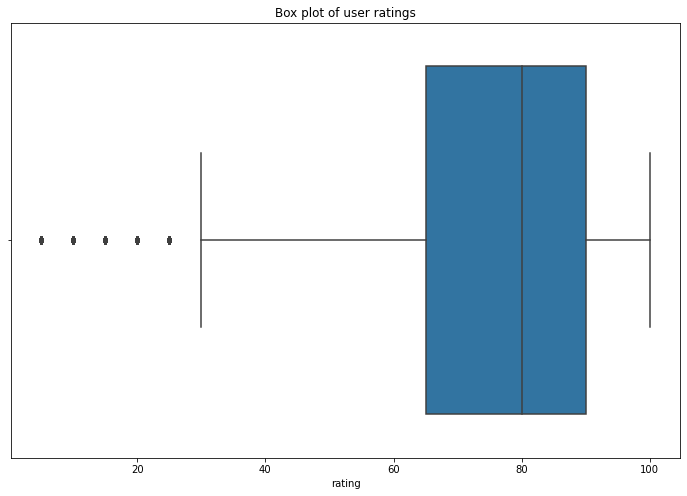

In [71]:
plt.figure(figsize=(12,8))
plt.title("Box plot of user ratings")
sns.boxplot(x= user_db_lightfm['rating'])
plt.savefig("user_ratings_boxplot.png");

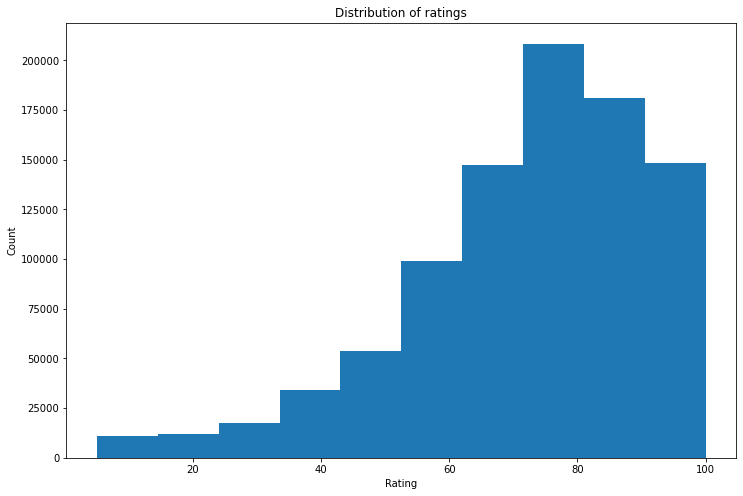

In [64]:
plt.figure(figsize=(12,8))
plt.hist(user_db_lightfm['rating'],bins=10)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of ratings")
plt.savefig("rating_dist.png");

In [31]:
user_db_lightfm['rating'].value_counts(normalize=True).cumsum()

80     0.185641
90     0.331654
70     0.471551
100    0.605392
60     0.705472
50     0.759831
85     0.812390
75     0.855194
40     0.890604
95     0.919183
65     0.941056
30     0.958902
20     0.971131
10     0.980687
55     0.989018
45     0.993323
5      0.995952
35     0.998154
25     0.999341
15     1.000000
Name: rating, dtype: float64

Majority of ratings are 60-100. 75.9% of ratings are >= 50. This could indicate that animes would generally have a high average score as ratings are heavily skewed to the higher end. This could be because the general viewer may see a rating below 50 as being too harsh. Those who rate < 50 are either haters or purists. Based on domain knowledge, even terrible animes can manage a score of > 50, and the score distribution for most animes have the same shape as this distribution curve 

In [32]:
rating_counts = pd.DataFrame(data=user_db_lightfm['mediaId'].value_counts())
rating_counts.columns = ['rating_counts']

In [33]:
top_10_popular = rating_counts.head(10).index

In [34]:
def get_ratings_count(anime_id):
    return rating_counts.loc[anime_id]

In [35]:
anime_db['ratings_count'] = anime_db['id'].apply(get_ratings_count)

In [36]:
anime_db[anime_db['id'].isin(top_10_popular)][['id','title_romaji','title_english','averageScore','ratings_count']].sort_values('ratings_count',ascending=False)

,id,title_romaji,title_english,averageScore,ratings_count
6510,16498,Shingeki no Kyojin,Attack on Titan,85.0,7946
9510,101922,Kimetsu no Yaiba,Demon Slayer: Kimetsu no Yaiba,85.0,7231
8167,21459,Boku no Hero Academia,My Hero Academia,78.0,7048
1331,1535,DEATH NOTE,Death Note,84.0,6930
7877,21087,One Punch Man,One-Punch Man,83.0,6335
7771,20958,Shingeki no Kyojin 2,Attack on Titan Season 2,85.0,6309
8475,21856,Boku no Hero Academia 2,My Hero Academia Season 2,81.0,5933
8217,21519,Kimi no Na wa.,Your Name.,86.0,5909
7767,20954,Koe no Katachi,A Silent Voice,88.0,5893
5754,11757,Sword Art Online,Sword Art Online,69.0,5814


Top 10 most popular anime are all expected as they are widely known to be interesting/good and are popular. They have high average scores (>75) as well, with the exception of Sword Art Online

In [37]:
anime_db[anime_db['ratings_count']==1].shape

(1044, 24)

There are 1044 animes that have only been rated by 1 user so there is not really a "Least 10 popular" animes

In [38]:
genre_counts = pd.DataFrame(data=anime_db['genres_str'].value_counts())
genre_counts.columns = ['genre_counts']
print(genre_counts.shape)
genre_counts.head(10)

(1111, 1)


,genre_counts
"Comedy, Slice of Life",210
Comedy,179
"Action, Adventure, Fantasy",109
"Action, Mecha, Sci-Fi",99
"Action, Sci-Fi",95
"Adventure, Comedy, Fantasy",95
Action,87
"Comedy, Romance",80
"Comedy, Romance, Slice of Life",80
"Action, Fantasy",72


The genres shown here have not been split, so each combination of genres will have a count. There are a total of 1111 combinations. The most common genre combination is "Comedy, Slice of Life". Comedy apears in half the combinations in the top 10.

In [39]:
split_genres = anime_db['genres_str'].str.get_dummies(', ')
split_genres.columns = split_genres.columns.str.lower().str.replace(" ","_")

In [40]:
anime_db = pd.concat([anime_db,split_genres],axis=1)

In [41]:
genre_count = []

for column in split_genres.columns:
    genre_count.append(anime_db[anime_db[column]==1][column].count())

In [42]:
genres_count_df = pd.DataFrame(data=[split_genres.columns.values,genre_count]).T
genres_count_df.columns = ['genre','count']

In [43]:
genres_count_df.sort_values('count',ascending=False)

,genre,count
2,comedy,2694
0,action,2477
3,drama,1754
5,fantasy,1657
1,adventure,1630
13,sci-fi,1501
12,romance,1393
14,slice_of_life,988
16,supernatural,943
8,mecha,603


The most common genre is Comedy, followed by Action and Drama

## Exports

### Export data for modelling

In [44]:
id_genre_dict = {x:y for x,y in zip(anime_db['id'],anime_db['genres'])}

In [45]:
user_db_lightfm['genres'] = user_db_lightfm['mediaId'].map(id_genre_dict)

In [46]:
user_db_lightfm.to_pickle('../data/user_db_lightfm_genres.pkl')

### Export titles, anime id and titles mapping

For the webapp drop-down list and mapping predictions

In [47]:
anime_db['all_relations'] = anime_db['id'].apply(convert_to_list) + anime_db['relations']

In [48]:
id_and_relations_dict = {x:y for x,y in zip(anime_db['id'],anime_db['all_relations'])}

In [49]:
# recursive function to get main series id
def get_series_id(current_id,relations_id):
    if relations_id is np.nan or relations_id is None:
        return None
    
    relations_id = [int(x) for x in relations_id if int(x) in id_and_relations_dict.keys()]
    relations_id.sort()
    
    if len(relations_id) > 0:
        if current_id == min(relations_id):
            return current_id
        else:
            current_id = min(relations_id)
            return get_series_id(current_id,id_and_relations_dict[current_id])
    else:
        return None

In [50]:
series_id_list = []

for anime_id in id_and_relations_dict:
    series_id_list.append(get_series_id(anime_id,id_and_relations_dict[anime_id]))

In [51]:
series_mapping = {x:y for x,y in zip(id_and_relations_dict,series_id_list)}

In [52]:
anime_db['series_id'] = anime_db['id'].map(series_mapping)
anime_db['series_id'].fillna(anime_db['id'],inplace=True)
anime_db['series_id'] = anime_db['series_id'].astype(np.int64)

In [53]:
title_romaji_mapping = {x:y for x,y in zip(anime_db['id'],anime_db['title_romaji'])}
title_english_mapping = {x:y for x,y in zip(anime_db['id'],anime_db['title_english'])}

In [54]:
anime_db['series_title_romaji'] = anime_db['series_id'].map(title_romaji_mapping)
anime_db['series_title_english'] = anime_db['series_id'].map(title_english_mapping)

Performed a recursive search to get the id of the first anime of the series, with the intent to collapse related titles into 1 title to reduce clutter in the list of anime titles. However, upon further analysis, doing so is not ideal. While titles like Shingeki no Kyojin's/Attack on Titan's multiple seasons can be collapsed into 1 title "Shingeki no Kyojin" (or "Attack on Titan" for its english title), it also collapses anime titles which are spin-offs of the main series, which are considered to be different from the main series. E.g. the Toaru series. 

The Toaru series started with Toaru Majutsu no Index/A Certain Magical Index, and 2 spin-offs were made from it, Toaru Kagaku no Railgun/A Certain Scientific Railgun and Toaru Kagaku no Accelerator/A Certain Scientific Accelerator. While the 3 are related and take place in the same universe and cover events that took place around the same time period, they are seen as separate animes belonging to the same universe. Therefore, collapsing anime titles into their main series title is not ideal.

In [55]:
anime_db_id_titles = anime_db[['id','title_romaji','title_english','genres']]
anime_db_id_titles.head()

,id,title_romaji,title_english,genres
0,1,Cowboy Bebop,Cowboy Bebop,"[Action, Adventure, Drama, Sci-Fi]"
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie - Knockin' on Heaven's...,"[Action, Drama, Mystery, Sci-Fi]"
2,6,TRIGUN,Trigun,"[Action, Adventure, Comedy, Drama, Sci-Fi]"
3,7,Witch Hunter ROBIN,Witch Hunter ROBIN,"[Action, Drama, Mystery, Supernatural]"
4,8,Bouken Ou Beet,Beet the Vandel Buster,"[Adventure, Fantasy, Supernatural]"


In [56]:
anime_db_id_titles.to_pickle("../data/anime_id_mapping.pkl")

In [57]:
anime_title_list_english = list(anime_db_id_titles['title_english'].values)
anime_title_list_romaji = list(anime_db_id_titles['title_romaji'].values)
# to remove duplicates as we imputed missing values in title_english with title_romaji
# there are also instances where the romaji and english titles are the same
anime_title_list = list(set(anime_title_list_english + anime_title_list_romaji))
# to have the list displayed in the app in alphabetical order
anime_title_list.sort()

In [58]:
pickle.dump(anime_title_list, open('../data/anime_titles.pkl', 'wb'))

In [59]:
anime_db.to_pickle("../data/anime_db_cleaned.pkl")

### Export genres

For the app genres drop-down list

In [60]:
anime_genres = list(anime_db['genres'].dropna().values)
anime_genre_list = []

for genres in anime_genres:
    anime_genre_list.extend(genres)

anime_genre_list = list(set(anime_genre_list))
anime_genre_list.sort()

In [61]:
pickle.dump(anime_genre_list, open('../data/anime_genres.pkl', 'wb'))